In [3]:
import pandas as pd 
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [4]:
#verificando se o target está balanceado
output_counts = df['output'].value_counts()
print(output_counts)

1    165
0    138
Name: output, dtype: int64


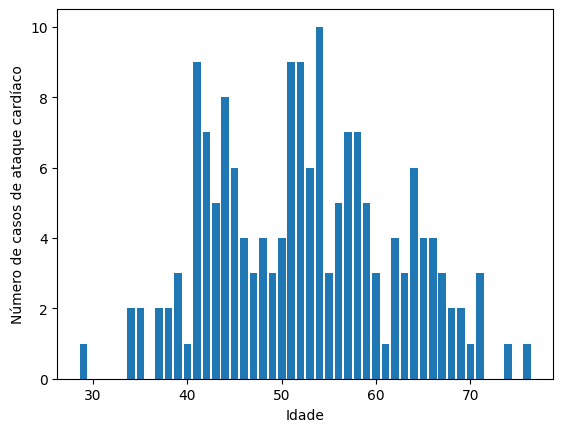

In [8]:
# agrupa as idades e a ocorrência de ataque cardíaco
age_output = df.groupby(['age', 'output']).size().reset_index(name='count')

# filtra apenas os casos em que houve ataque cardíaco
age_output = age_output[age_output['output'] == 1]

# plota o gráfico de barras
plt.bar(age_output['age'], age_output['count'])
plt.xlabel('Idade')
plt.ylabel('Número de casos de ataque cardíaco')
plt.show()

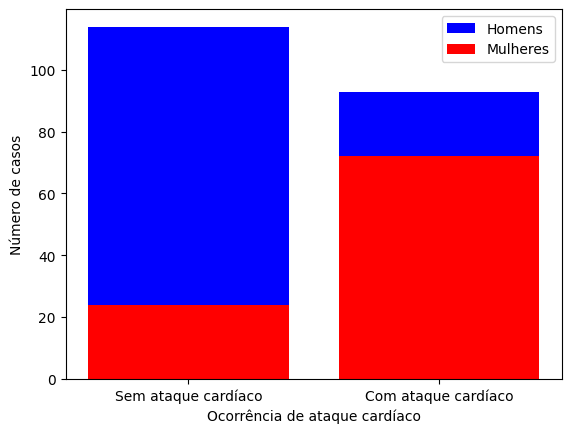

In [14]:
sex_output = df.groupby(['sex', 'output']).size().reset_index(name='count')

# separa os dados por sexo
male_data = sex_output[sex_output['sex'] == 1]
female_data = sex_output[sex_output['sex'] == 0]

# plota o gráfico de barras empilhadas
plt.bar(male_data['output'], male_data['count'], color='blue', label='Homens')
plt.bar(female_data['output'], female_data['count'], color='red', label='Mulheres')
plt.xticks([0, 1], ['Sem ataque cardíaco', 'Com ataque cardíaco'])
plt.xlabel('Ocorrência de ataque cardíaco')
plt.ylabel('Número de casos')
plt.legend()
plt.show()

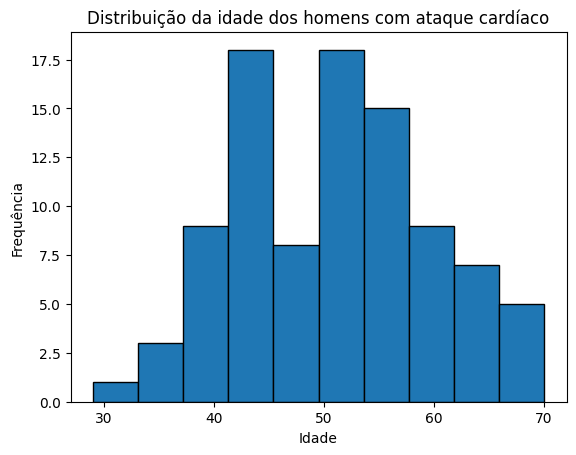

In [15]:
# filtra os dados para homens com ataque cardíaco
male_heart_attack = df[(df['sex'] == 1) & (df['output'] == 1)]

# plota o histograma da idade dos homens com ataque cardíaco
plt.hist(male_heart_attack['age'], bins=10, edgecolor='black')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Distribuição da idade dos homens com ataque cardíaco')
plt.show()

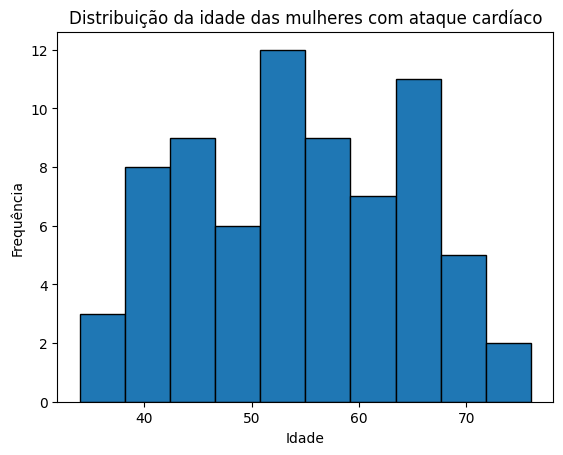

In [16]:
# filtra os dados para homens com ataque cardíaco
male_heart_attack = df[(df['sex'] == 0) & (df['output'] == 1)]

# plota o histograma da idade dos homens com ataque cardíaco
plt.hist(male_heart_attack['age'], bins=10, edgecolor='black')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Distribuição da idade das mulheres com ataque cardíaco')
plt.show()

# Seleção de Features

In [5]:
import seaborn as sns

In [6]:
# calcula a correlação de Pearson entre as variáveis e a coluna de output
corr = df.corr()['output'].abs().sort_values(ascending=False)
print(corr)

output      1.000000
exng        0.436757
cp          0.433798
oldpeak     0.430696
thalachh    0.421741
caa         0.391724
slp         0.345877
thall       0.344029
sex         0.280937
age         0.225439
trtbps      0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: output, dtype: float64


# Criação do modelo de Regressão Logística


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

In [9]:
# seleciona as features e o target

features = df[['exng','cp','oldpeak','thalachh','caa','slp','thall']]
target = df['output']
X = features
y = target

# divide os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# define o modelo de regressão logística com validação cruzada
model = LogisticRegression(random_state= 42)

# treina o modelo
model.fit(X_train, y_train)

# faz a predição no conjunto de teste
y_pred = model.predict(X_test)

# calcula a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print('Acurácia:', accuracy)

Acurácia: 0.8852459016393442


c:\dev\python\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
from sklearn.metrics import confusion_matrix

# Fazer as previsões no conjunto de testes
y_pred = model.predict(X_test)

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)


[[25  4]
 [ 3 29]]


In [23]:
from sklearn.metrics import classification_report

# Fazer as previsões no conjunto de testes
y_pred = model.predict(X_test)

# Exibir o classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



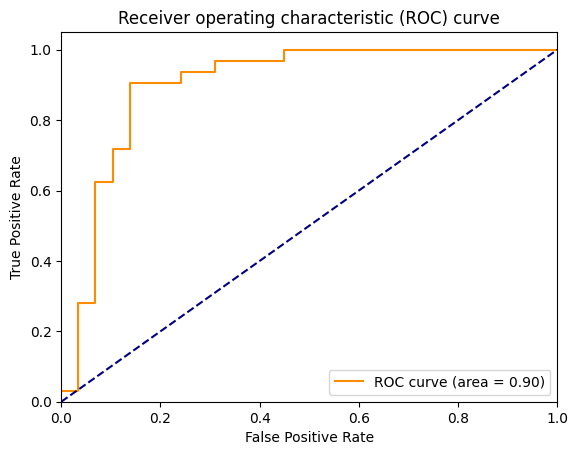

In [53]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calcular as probabilidades de previsão para o conjunto de testes
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calcular a curva ROC e a área sob a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plotar a curva ROC
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


# Melhorando os hiperparâmetros

In [11]:
from sklearn.model_selection import GridSearchCV

In [ ]:
search_space = {
    "penalty" : ["none","l2","l1",'elasticnet'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter' : [0.001,0.01,0.1,1,10,100,1000,10000]

}

lr = LogisticRegression()

grid_search = GridSearchCV(lr,search_space,cv= 5)
grid_search.fit(X_train,y_train)



In [15]:
print(grid_search.best_estimator_)

LogisticRegression(C=1, max_iter=10, solver='liblinear')


In [16]:
print(grid_search.best_params_)

{'C': 1, 'max_iter': 10, 'penalty': 'l2', 'solver': 'liblinear'}


In [17]:
print(grid_search.best_score_)

0.8224489795918366


In [21]:
# seleciona as features e o target

features = df[['exng','cp','oldpeak','thalachh','caa','slp','thall']]
target = df['output']
X = features
y = target

# divide os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# define o modelo de regressão logística com validação cruzada
model = LogisticRegression()
model.set_params(**grid_search.best_params_)
# treina o modelo
model.fit(X_train, y_train)

# faz a predição no conjunto de teste
y_pred = model.predict(X_test)

# calcula a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print('Acurácia:', accuracy)

Acurácia: 0.8852459016393442


c:\dev\python\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [24]:
# Fazer as previsões no conjunto de testes
y_pred = model.predict(X_test)

# Exibir o classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



# Criando modelo com  Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier
X = df.drop('output', axis=1)
y = df['output']
# Criar um objeto do modelo de Random Forest com 100 árvores
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Treinar o modelo com os dados de treino
rf.fit(X_train, y_train)

# Fazer as previsões com os dados de teste
y_pred = rf.predict(X_test)

# Calcular a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8688524590163934


In [56]:
# Fazer as previsões no conjunto de testes
y_pred = rf.predict(X_test)

# Exibir o classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

